# Heart Disease Prediction - EDA with MLflow Logging

This notebook performs comprehensive exploratory data analysis and logs all statistics and visualizations to MLflow for experiment tracking.

## Setup
- All plots and statistics are logged to MLflow
- Experiment: heart-disease-eda
- View results: http://localhost:5001

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
# Setup MLflow
mlflow.set_experiment("heart-disease-eda")

# Start MLflow run
mlflow.start_run(run_name="EDA_Notebook_Analysis")

print("MLflow run started")
print("   Experiment: heart-disease-eda")
print("   View at: http://localhost:5001")

2026/01/06 03:01:55 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/06 03:01:55 INFO mlflow.store.db.utils: Updating database tables
2026/01/06 03:01:55 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/06 03:01:55 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/06 03:01:55 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/06 03:01:55 INFO alembic.runtime.migration: Will assume non-transactional DDL.


MLflow run started
   Experiment: heart-disease-eda
   View at: http://localhost:5001


## 1. Data Loading

In [3]:
# Load data
DATA_PATH = "data/raw/heart_disease_combined.csv"
df = pd.read_csv(DATA_PATH)

print(f"Data Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Log to MLflow
mlflow.log_param("dataset_path", DATA_PATH)
mlflow.log_param("total_samples", len(df))
mlflow.log_param("total_features", len(df.columns) - 1)

df.head()

Data Shape: (920, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 2. Dataset Overview

In [4]:
# Dataset info
print("Dataset Information:")
df.info()

print("\nDataset Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB

Dataset Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
# Log dataset statistics
missing_values = int(df.isnull().sum().sum())
duplicate_rows = int(df.duplicated().sum())
target_0_count = int((df['target'] == 0).sum())
target_1_count = int((df['target'] == 1).sum())
target_balance_ratio = float((df['target'] == 1).sum() / len(df))

mlflow.log_param("missing_values", missing_values)
mlflow.log_param("duplicate_rows", duplicate_rows)
mlflow.log_param("target_0_count", target_0_count)
mlflow.log_param("target_1_count", target_1_count)
mlflow.log_param("target_balance_ratio", target_balance_ratio)

print(f"Missing Values: {missing_values}")
print(f"Duplicate Rows: {duplicate_rows}")
print(f"Target Distribution: {target_0_count} (0) vs {target_1_count} (1)")
print(f"Target Balance Ratio: {target_balance_ratio:.2%}")

Missing Values: 1759
Duplicate Rows: 2
Target Distribution: 411 (0) vs 265 (1)
Target Balance Ratio: 28.80%


## 3. Feature Statistics

In [6]:
# Log feature-level statistics to MLflow
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('target')

for feature in numerical_features:
    mlflow.log_metric(f"{feature}_mean", float(df[feature].mean()))
    mlflow.log_metric(f"{feature}_std", float(df[feature].std()))
    mlflow.log_metric(f"{feature}_min", float(df[feature].min()))
    mlflow.log_metric(f"{feature}_max", float(df[feature].max()))

print(f"Statistics logged for {len(numerical_features)} features")

Statistics logged for 13 features


## 4. Correlation Analysis

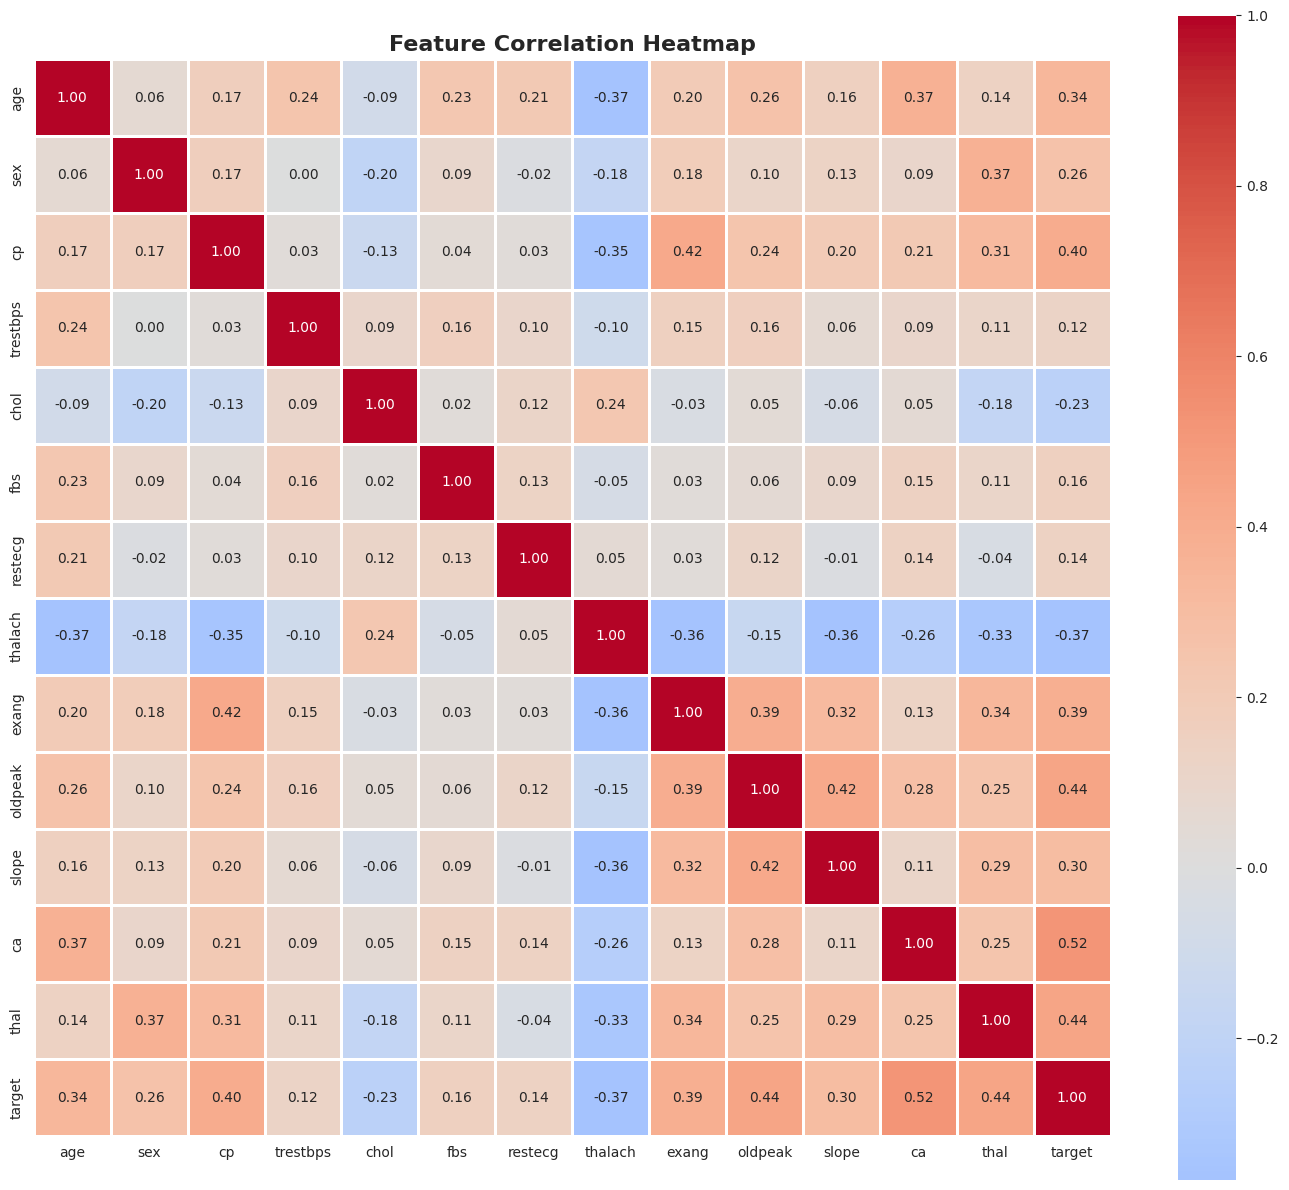

Correlation heatmap logged to MLflow


In [7]:
# Calculate correlation matrix
corr = df.corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()

# Save and log to MLflow
output_path = "data/processed/correlation_heatmap.png"
Path(output_path).parent.mkdir(parents=True, exist_ok=True)
plt.savefig(output_path, dpi=300, bbox_inches='tight')
mlflow.log_artifact(output_path)
plt.show()

print("Correlation heatmap logged to MLflow")

In [8]:
# Log top correlations with target
target_corr = corr['target'].abs().sort_values(ascending=False)[1:6]

print("Top 5 Features Correlated with Target:")
for i, (feature, corr_value) in enumerate(target_corr.items(), 1):
    print(f"{i}. {feature}: {corr_value:.4f}")
    mlflow.log_metric(f"top{i}_correlation_with_target", float(corr_value))
    mlflow.log_param(f"top{i}_correlated_feature", feature)

Top 5 Features Correlated with Target:
1. ca: 0.5162
2. oldpeak: 0.4431
3. thal: 0.4404
4. cp: 0.3979
5. exang: 0.3884


## 5. Feature Distributions

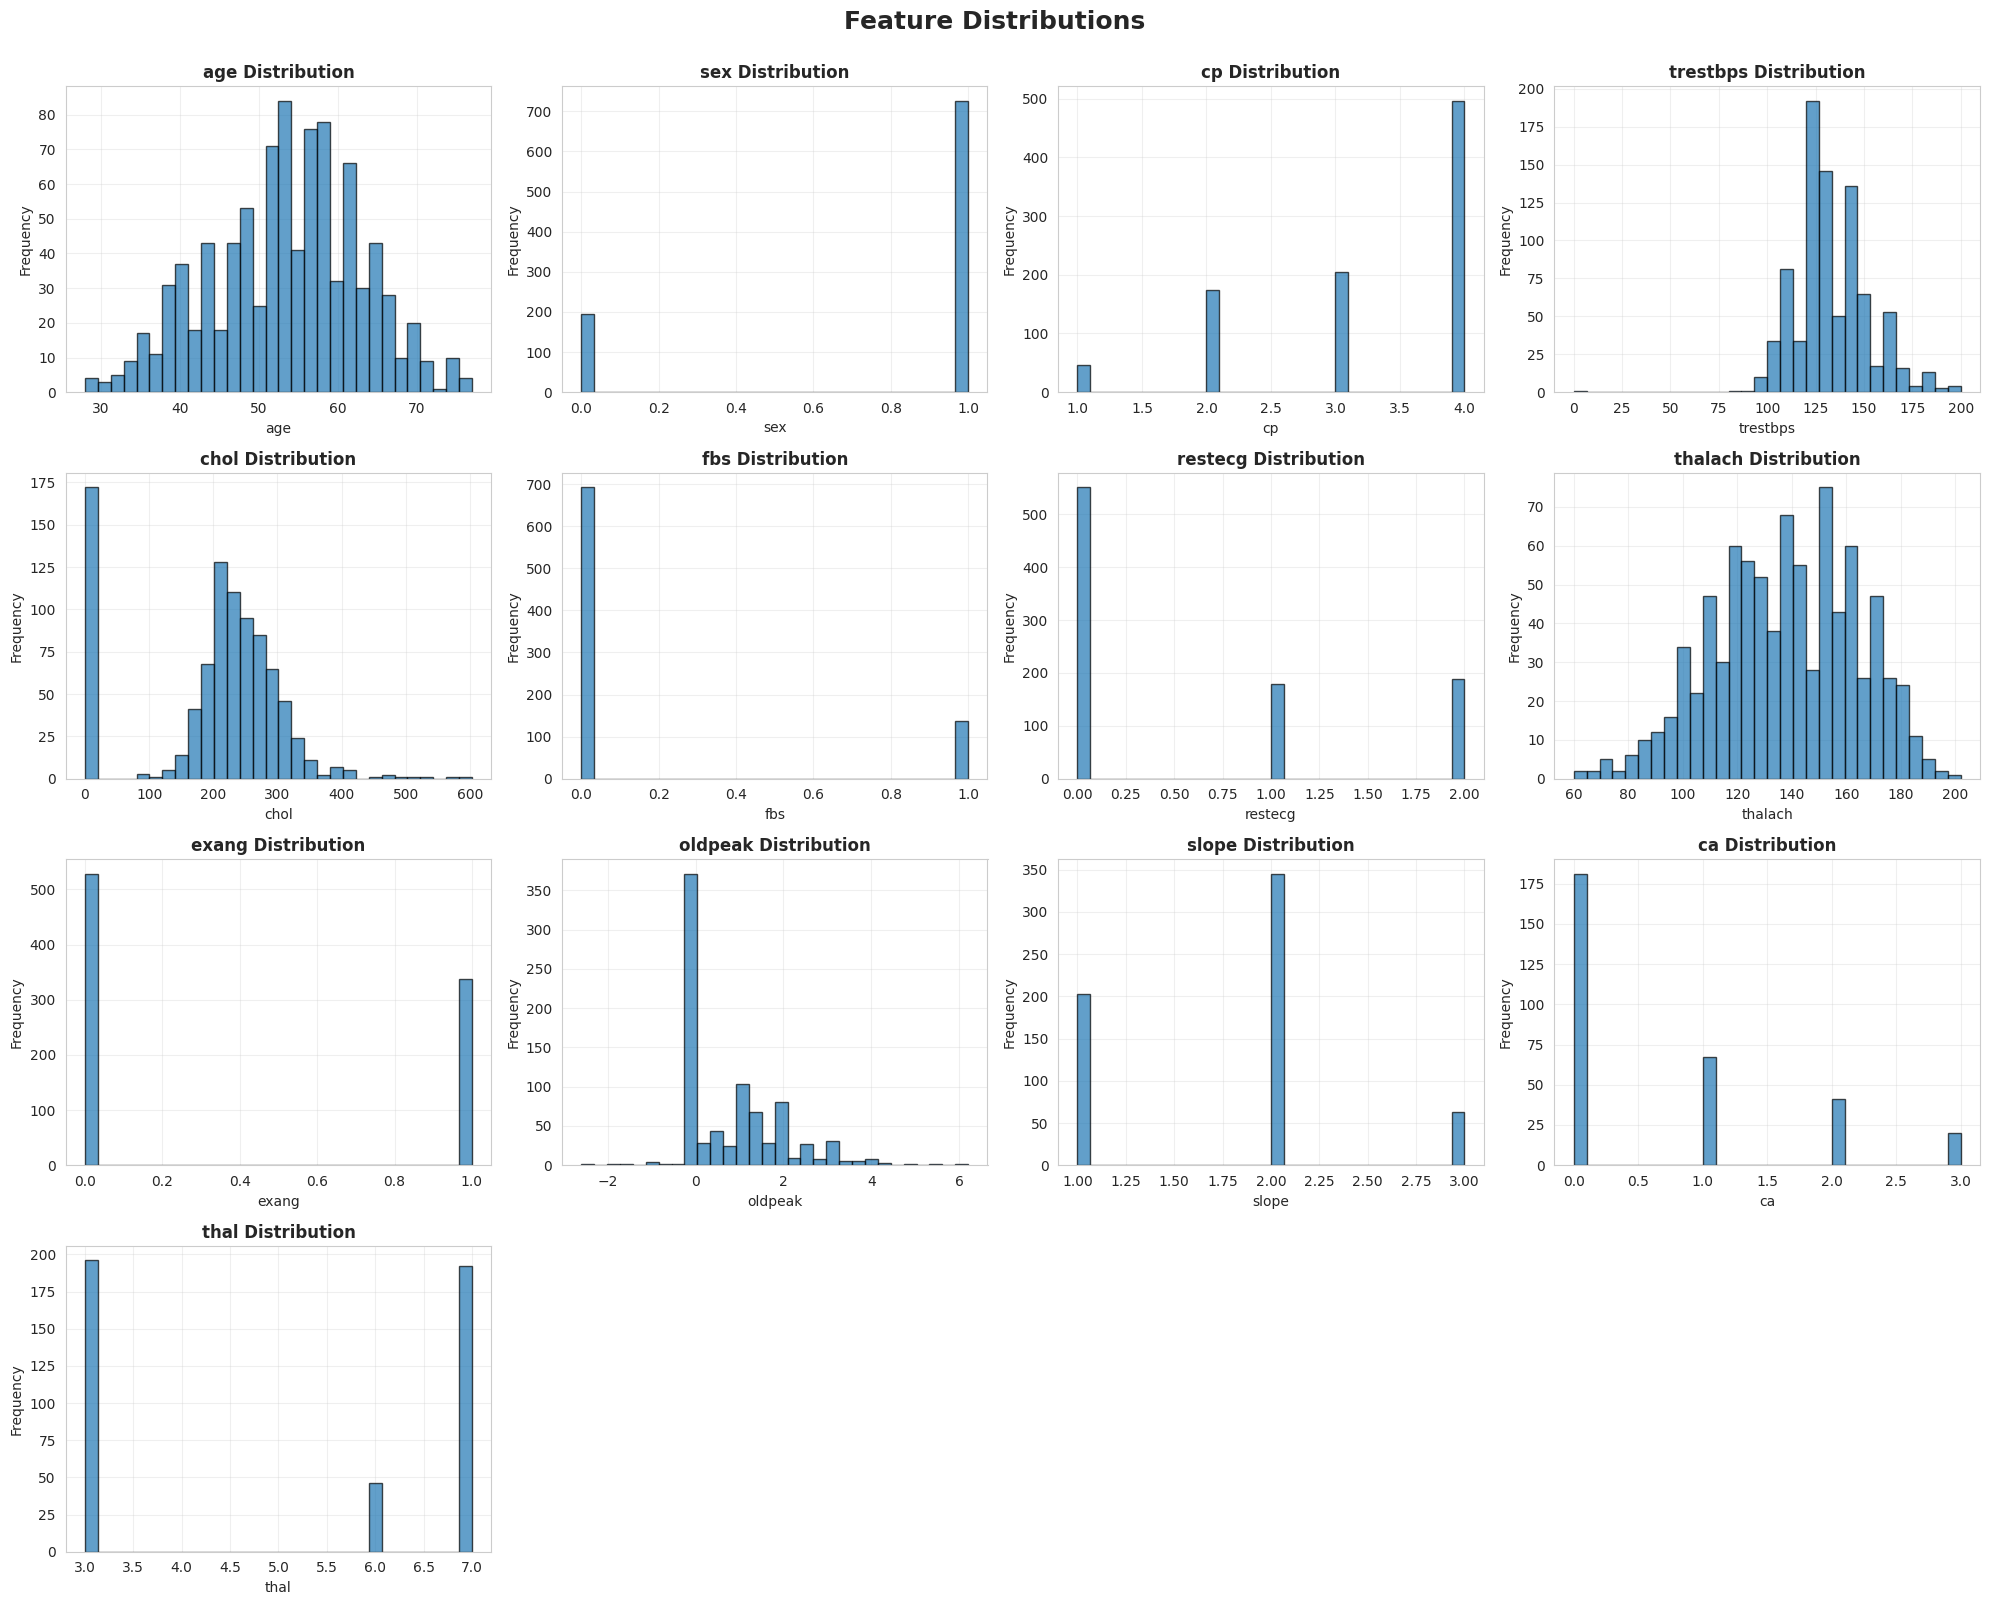

Feature distributions logged to MLflow


In [9]:
# Create feature distribution plots
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('target')

n_features = len(numerical_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature} Distribution', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

# Hide empty subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Feature Distributions', fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()

# Save and log to MLflow
output_path = "data/processed/feature_distributions.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
mlflow.log_artifact(output_path)
plt.show()

print("Feature distributions logged to MLflow")

## 6. Feature Boxplots by Target

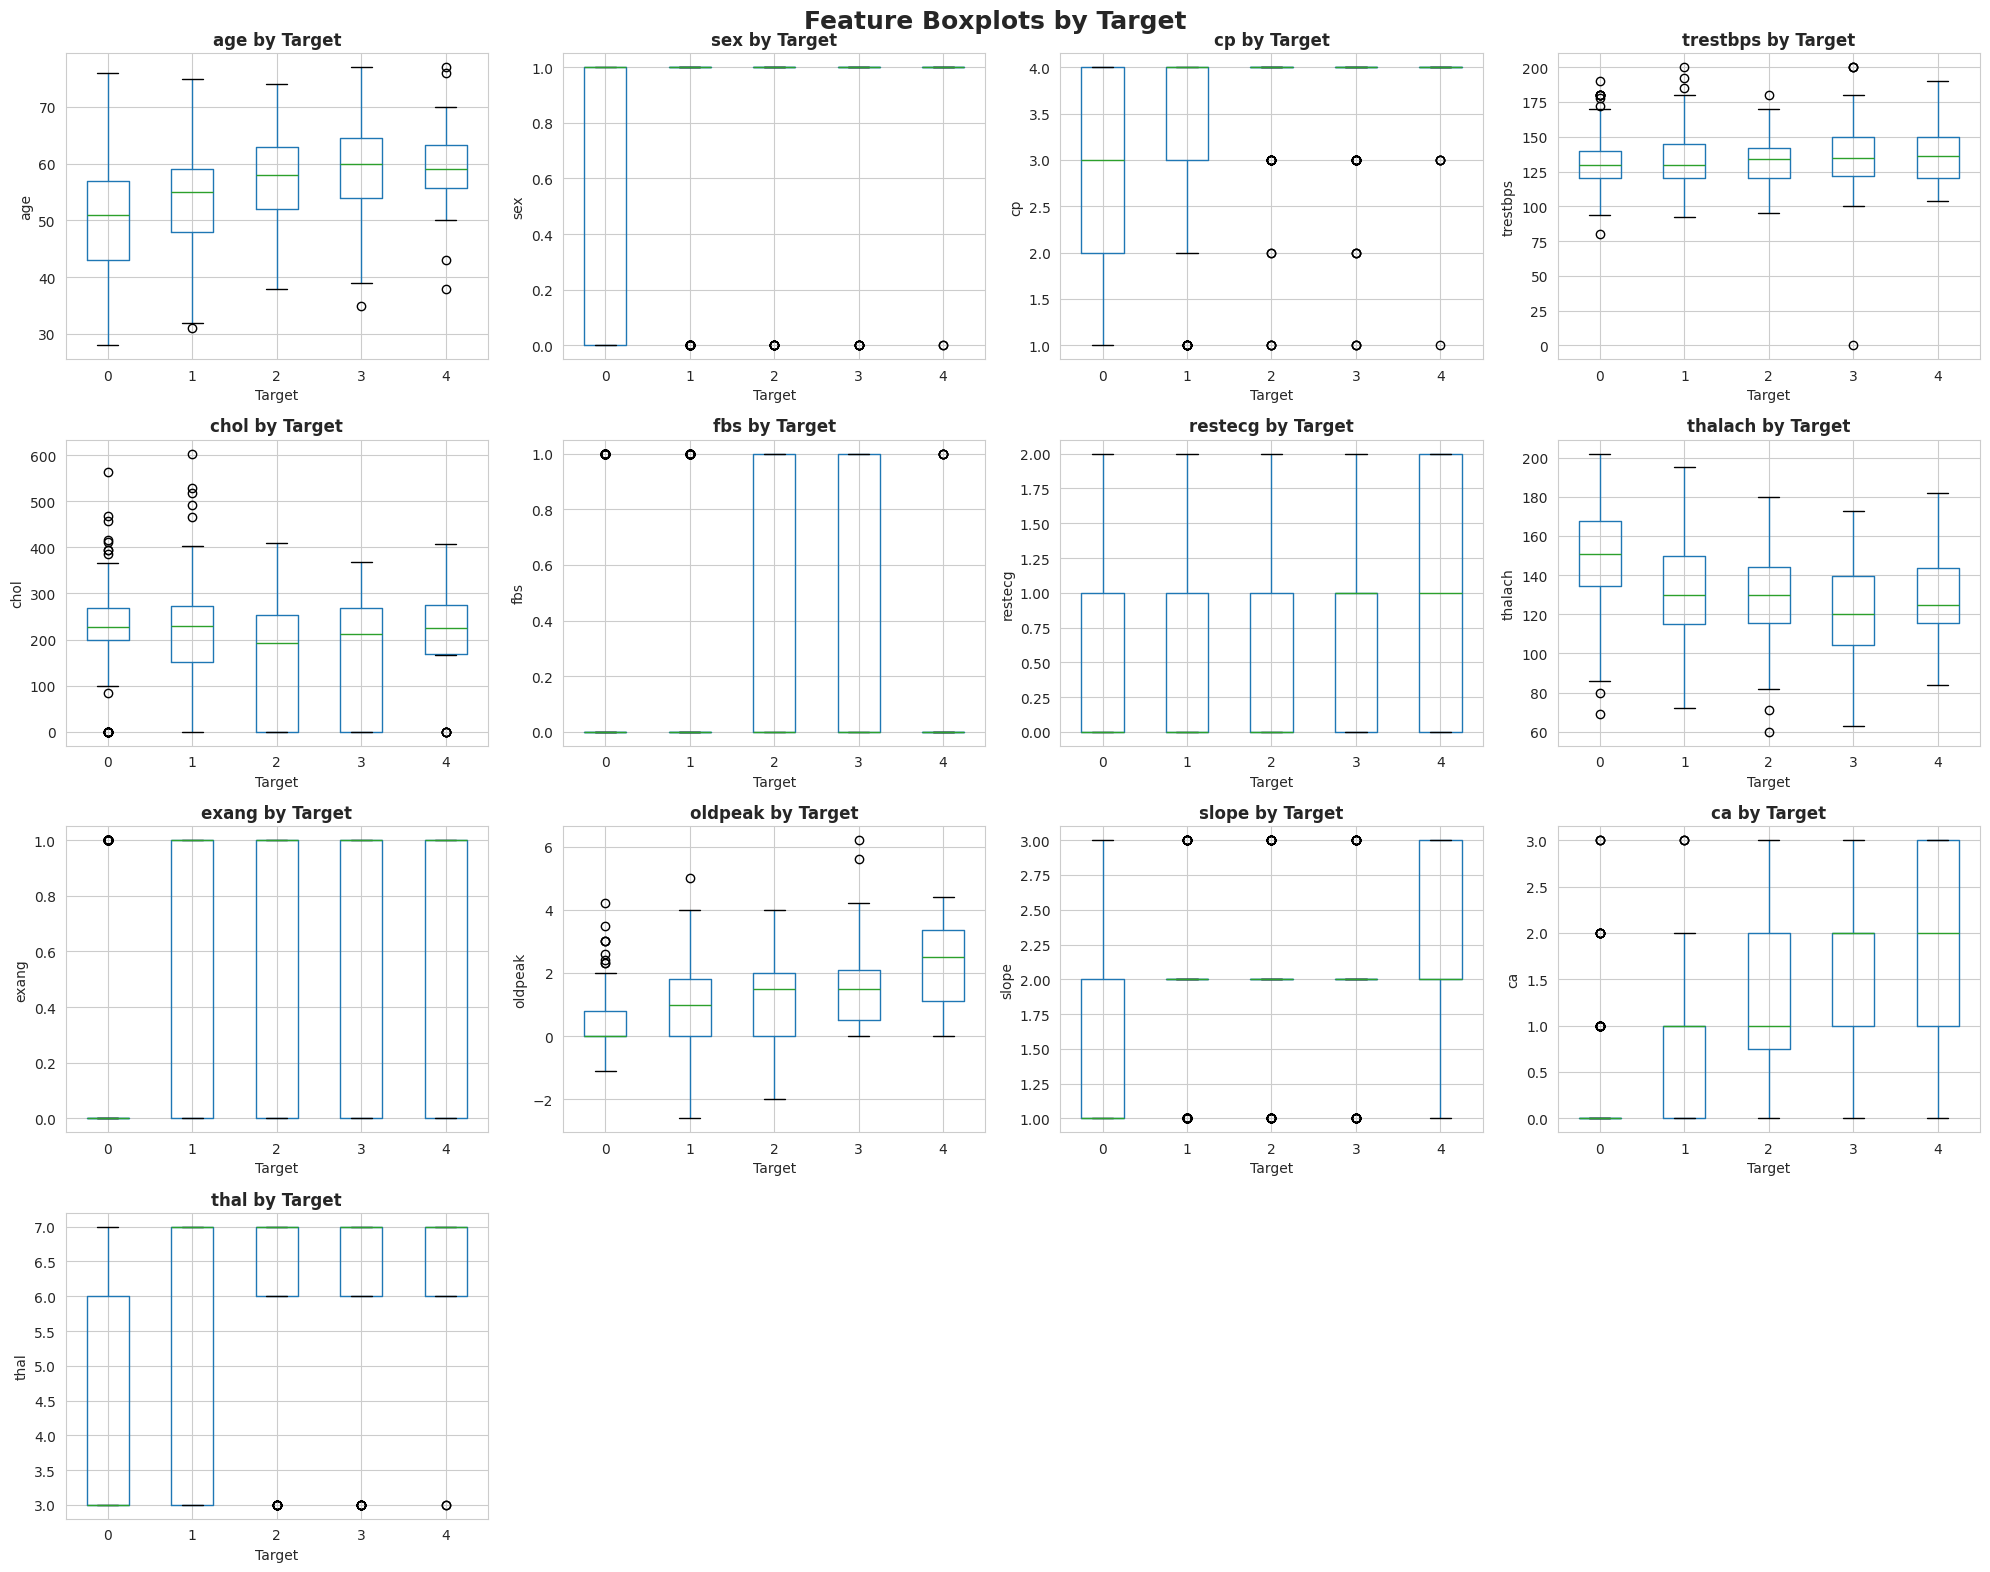

Feature boxplots logged to MLflow


In [10]:
# Create boxplots for features by target
n_features = len(numerical_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    df.boxplot(column=feature, by='target', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Target', fontweight='bold')
    axes[idx].set_xlabel('Target')
    axes[idx].set_ylabel(feature)

# Hide empty subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Feature Boxplots by Target', fontsize=18, fontweight='bold')
plt.tight_layout()

# Save and log to MLflow
output_path = "data/processed/feature_boxplots.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
mlflow.log_artifact(output_path)
plt.show()

print("Feature boxplots logged to MLflow")

## 7. Target Distribution

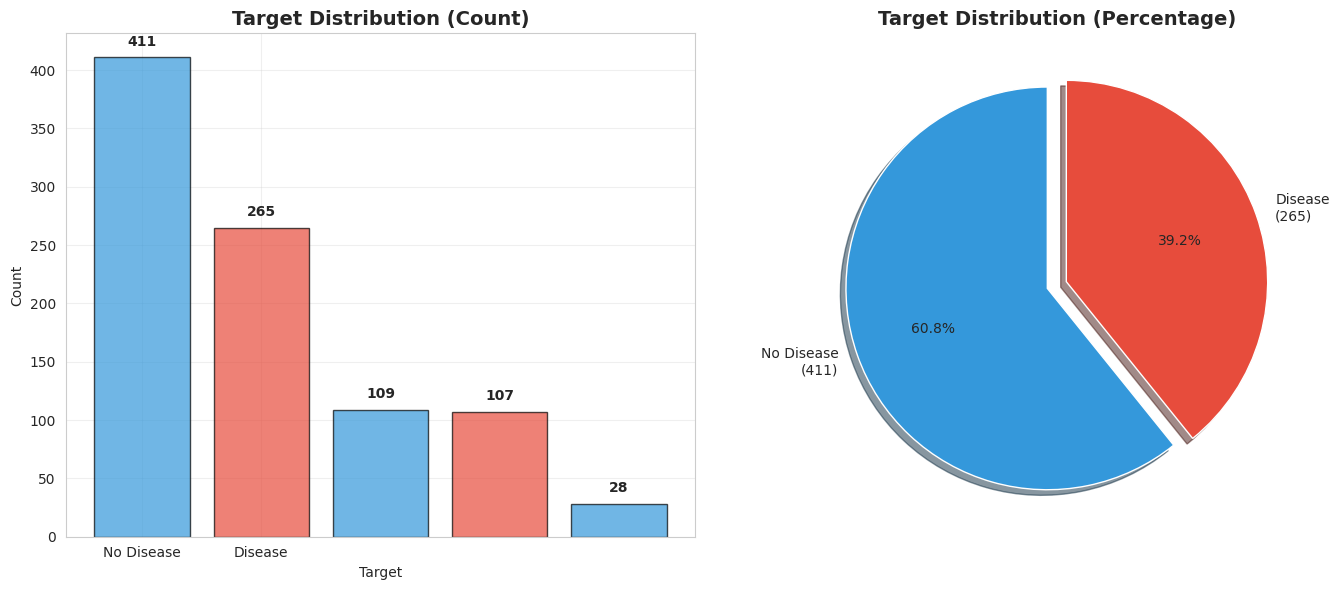

Target distribution logged to MLflow


In [11]:
# Create target distribution plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Count plot
target_counts = df['target'].value_counts().sort_index()
axes[0].bar(target_counts.index, target_counts.values, 
            color=['#3498db', '#e74c3c'], edgecolor='black', alpha=0.7)
axes[0].set_title('Target Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Disease', 'Disease'])
axes[0].grid(alpha=0.3)

# Add value labels
for idx, label in enumerate(target_counts.index):
    axes[0].text(label, target_counts.iloc[idx] + 10, str(target_counts.iloc[idx]), 
                ha='center', fontweight='bold')

# Pie chart  
colors = ['#3498db', '#e74c3c']
sizes = [target_counts.iloc[0], target_counts.iloc[1]]
labels = [f'No Disease\n({sizes[0]})', f'Disease\n({sizes[1]})']
axes[1].pie(sizes, labels=labels, 
            autopct='%1.1f%%', colors=colors, startangle=90,
            explode=(0.05, 0.05), shadow=True)
axes[1].set_title('Target Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()

# Save and log to MLflow
output_path = "data/processed/target_distribution.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
mlflow.log_artifact(output_path)
plt.show()

print("Target distribution logged to MLflow")

## 8. Summary and MLflow Completion

In [12]:
# End MLflow run
mlflow.end_run()

print("\n" + "="*60)
print("EDA COMPLETE!")
print("="*60)
print(f"\nLogged to MLflow:")
print(f"   - {len(df)} samples")
print(f"   - {len(df.columns)-1} features")
print(f"   - 4 visualization plots")
print(f"   - Feature-level statistics")
print(f"   - Top feature correlations")
print(f"\nView in MLflow UI: http://localhost:5001")
print("   Experiment: heart-disease-eda")
print("="*60 + "\n")


EDA COMPLETE!

Logged to MLflow:
   - 920 samples
   - 13 features
   - 4 visualization plots
   - Feature-level statistics
   - Top feature correlations

View in MLflow UI: http://localhost:5001
   Experiment: heart-disease-eda

